# TP3 Credit Card #Finance (partie 1)
## Détection de fraude de carte bancaire
## Analyse des données / Fouille des données
Mise en œuvre des algorithmes d'apprentissage automatique supervisé et non supervisé en respectant toutes les étapes de construction d'un modèle

In [1]:
# Import des librairies
import numpy as np # librairie de calcul numérique
import pandas as pd # librairie de statistiques
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt # librairie de tracé de figures
import seaborn as sns
import matplotlib.patches as mpatches

In [2]:
df = pd.read_csv('creditcard.csv') # chargement de la base de données
df_init = df.copy() # sauvegarde du dataframe chargé

In [3]:
#Nombre de lignes, nombre de colonnes
df.shape

(284807, 31)

## Analyse univariable : Class

In [4]:
#Nombre de transactions bancaires par classe
df.groupby('Class').size()

Class
0    284315
1       492
dtype: int64

In [5]:
#Répartition des transactions bancaires par classe
df['Class'].value_counts() / len(df) *100

0    99.827251
1     0.172749
Name: Class, dtype: float64

## Analyse univariable : Time

### Distribution de toutes les transactions bancaires dans le temps

Text(0, 0.5, 'Freq')

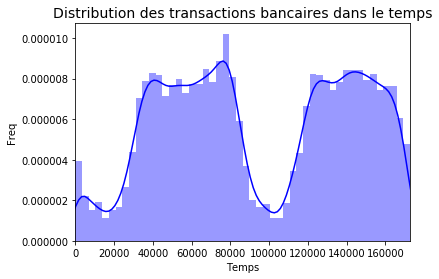

In [6]:
plt.figure()
time_val = df['Time'].values
sns.distplot(time_val, color='b')
plt.title('Distribution des transactions bancaires dans le temps', fontsize=14)
plt.xlim([min(time_val), max(time_val)])
plt.xlabel("Temps")
plt.ylabel("Freq")

Text(0.5, 1.0, 'Day 2')

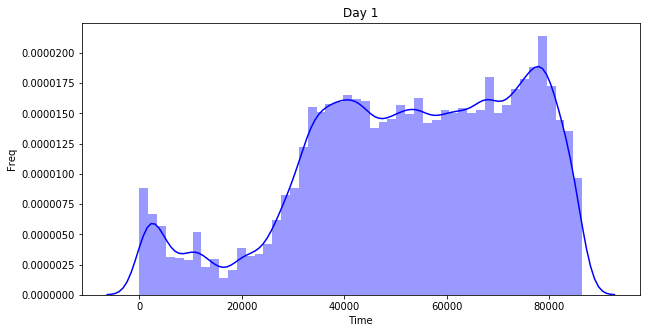

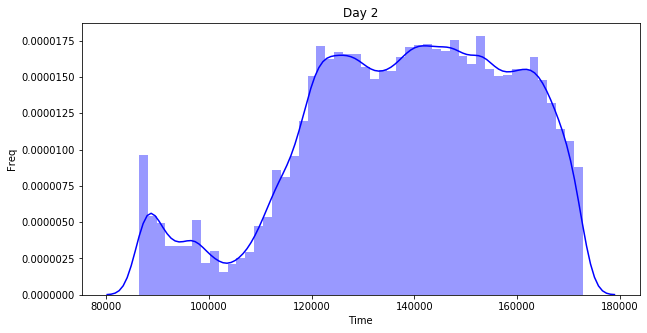

In [7]:
second_day = 60*60*24
index_day1 = np.where(df['Time'] < second_day)[0]
index_day2 = np.where(df['Time'] >= second_day)[0]

plt.figure(figsize=(10,5))
sns.distplot(df['Time'][index_day1], color='b')
plt.xlabel("Time")
plt.ylabel("Freq")
plt.title("Day 1")

plt.figure(figsize=(10,5))
sns.distplot(df['Time'][index_day2], color='b')
plt.xlabel("Time")
plt.ylabel("Freq")
plt.title("Day 2")

Est-ce que les transactions bancaires frauduleuses sont toujours effectuées à la même heure ?

### Distribution des transactions bancaires frauduleuses dans le temps

Text(0.5, 1.0, 'Histogramme des transactions frauduleuses pour le jour 2')

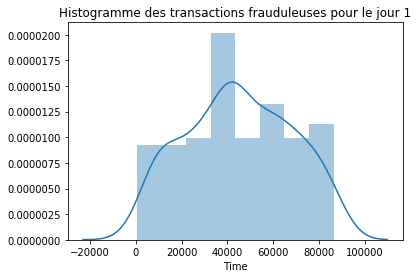

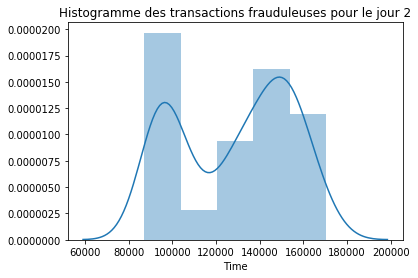

In [8]:
#Distribution des temps des transactions frauduleuses
x = df["Time"][df["Class"]==1]

plt.figure()
sns.distplot(x [x < second_day])
plt.title("Histogramme des transactions frauduleuses pour le jour 1")

plt.figure()
sns.distplot(x [x >= second_day])
plt.title("Histogramme des transactions frauduleuses pour le jour 2")

## Analyse uni-variable : Amount

In [9]:
df['Amount'].describe()
#np.median(df['Amount']) est le 50% du df.describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

Avez-vous remarqué que certaines transactions bancaires avaient un Amount à 0 ?

In [10]:
#Les transactions bancaires où Amount est à 0
zeroamount = df[ df['Amount']==0 ]
zeroamount.groupby("Class").size()
#Il y a 1825 transactions bancaires où Amount est à 0

Class
0    1798
1      27
dtype: int64

{'boxes': [<matplotlib.lines.Line2D at 0x171d1e398d0>],
 'caps': [<matplotlib.lines.Line2D at 0x171d1e48400>,
 'fliers': [<matplotlib.lines.Line2D at 0x171d1e48dd8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x171d1e48a90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x171d1e39cf8>,
  <matplotlib.lines.Line2D at 0x171d1e39e10>]}

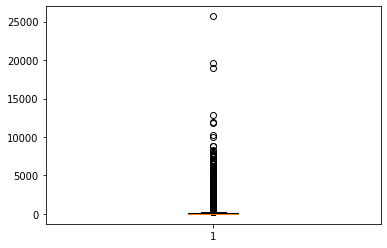

In [11]:
plt.boxplot(df["Amount"])

In [12]:
np.median(df['Amount'])

22.0

In [13]:
np.median(df['Amount'][df['Class']==1])

9.25

In [14]:
df.groupby('Class').describe()["Amount"]

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,88.291022,250.105092,0.0,5.65,22.00,77.05,25691.16
1,492.0,122.211321,256.683288,0.0,1.00,9.25,105.89,2125.87


Text(0.5, 1.0, 'Répartition des montants frauduleux')

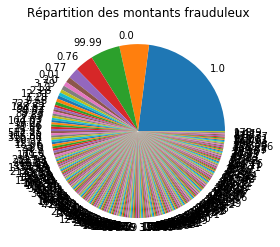

In [15]:
#fréquence des montants de transactions bancaires frauduleuses
amount_fraud = df['Amount'][df['Class']==1]
freq_amount_fraud = amount_fraud.value_counts()

#figure
plt.pie(freq_amount_fraud, labels=freq_amount_fraud.index)
plt.title('Répartition des montants frauduleux')

### Variables quantitatives

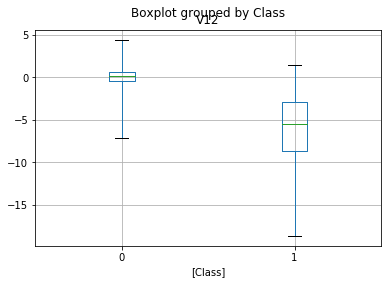

In [70]:
ax = sub_df[['V12','Class']].boxplot( by='Class', whis=(0,100) )

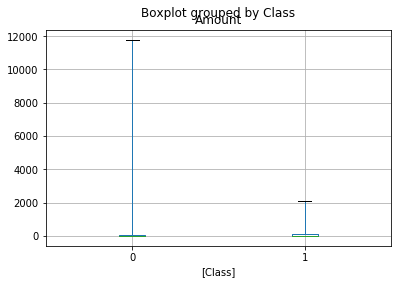

In [71]:
ax = sub_df[['Amount','Class']].boxplot( by='Class', whis=(0,100) )

(-10, 10)

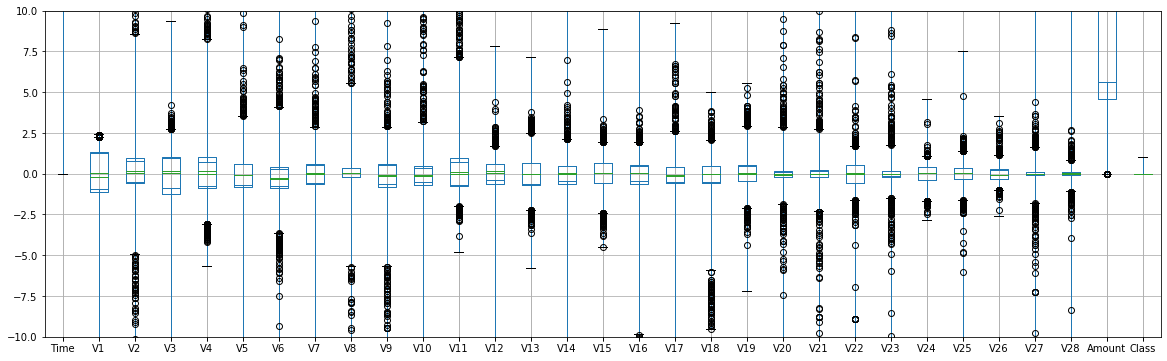

In [77]:
plt.figure(figsize=(20, 6))
ax = df[df.columns].boxplot( whis=(0,100) ) # for quantitative only (0,100) is the percentile that avoid outliers
sub_df[sub_df.columns].boxplot(whis=(1,99)) #on only a sub dataframe
ax.set_ylim([-10,10])

Text(0.5, 1.0, 'V14 Distribution \n (Fraud Transactions)')

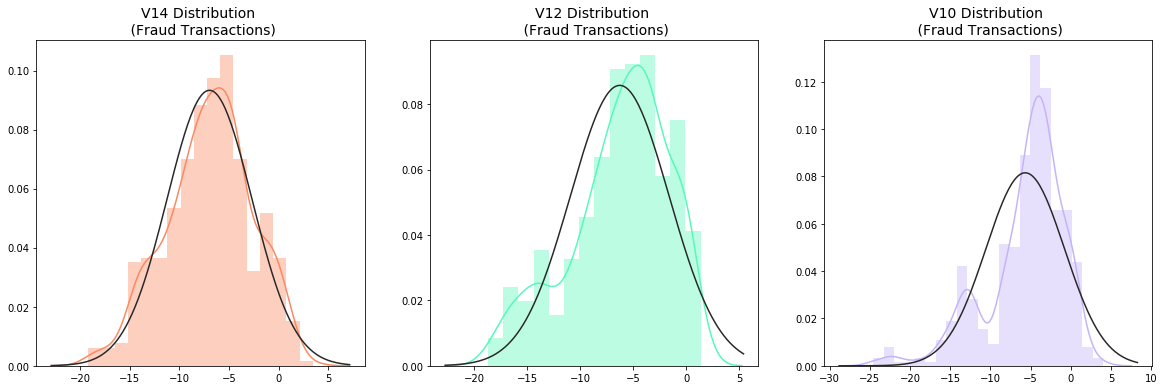

In [16]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v10_fraud_dist = df['V10'].loc[df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = df['V12'].loc[df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)

v14_fraud_dist = df['V14'].loc[df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)


In [18]:
def analyse_class( df, var='Time' ):
    ''' compare distribution of fraud and regular histograms on a variabl '''
    # ...
    # inscructions
    fraud = df['Class'] == 1
    regul = df['Class'] == 0
    if var == 'Time': in_hour = (1/3600)
    else: in_hour = 1
    # ...
    plt.figure()
    ax = plt.gca()
    sns.distplot( in_hour*df[var][regul] )
    sns.distplot( in_hour*df[var][fraud] )
    ax.set_xlim([in_hour*df[var].min(),in_hour*df[var].max()])
    # ...
    return ax

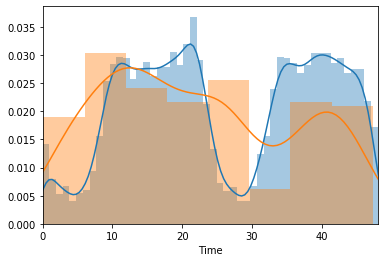

In [19]:
analyse_class( df, var='Time' )

(0, 1000)

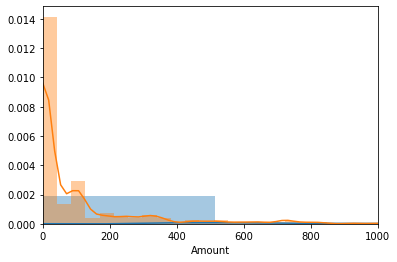

In [22]:
ax = analyse_class( df, var='Amount' )
ax.set_xlim([0,1000])

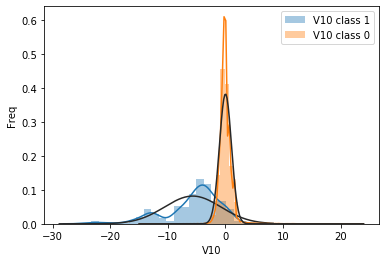

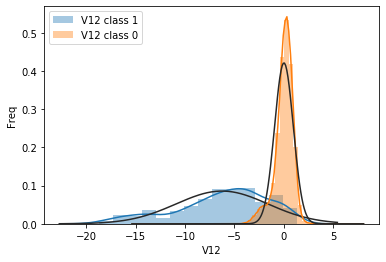

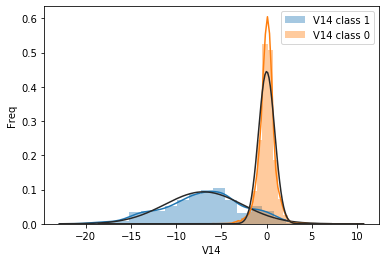

In [25]:
from scipy.stats import norm

plt.figure()
sns.distplot(df['V10'][df['Class']==1],fit=norm, label ='V10 class 1')
sns.distplot(df['V10'][df['Class']==0],fit=norm, label ='V10 class 0')
plt.ylabel("Freq")
plt.legend()

plt.figure()
sns.distplot(df['V12'][df['Class']==1],fit=norm, label ='V12 class 1')
sns.distplot(df['V12'][df['Class']==0],fit=norm, label ='V12 class 0')
plt.ylabel("Freq")
plt.legend()

plt.figure()
sns.distplot(df['V14'][df['Class']==1],fit=norm, label ='V14 class 1')
sns.distplot(df['V14'][df['Class']==0],fit=norm, label ='V14 class 0')
plt.ylabel("Freq")
plt.legend()

In [13]:
from scipy.stats import norm

def plot_hists( df, selection='fraud' ):
    ''' plot the histograms for all the variables '''
    # ...
    # preparation of selection and color
    if selection is 'all':
        selection = df['Class'] > -1
        color = 'blue'
    elif selection is 'fraud':
        selection = df['Class'] == 1
        color = 'red'
    elif selection is 'regul':
        selection = df['Class'] == 0
        color = 'green'
    # ...
    # create graphic
    f, axs = plt.subplots(4,7, figsize=(15, 8))
    plt.subplots_adjust( wspace=0.3, hspace=0.5 )
    # ...
    irow = 0
    icol = -1
    for ivar in range(1,29):
        # variable and row / column selection
        var_name = 'V'+str(ivar)
        icol += 1
        if icol == 7:
            irow += 1
            icol = 0
        axe = axs[irow,icol]
        # ...
        # plot
        sns.distplot( df[var_name][selection],ax=axe, fit=norm, color=color)
        # graphic properties
        axe.set_xlabel(None)
        axe.set_title(var_name)
        axe.set_xlim([df[var_name].min(),df[var_name].max()])
    # ...
    return None

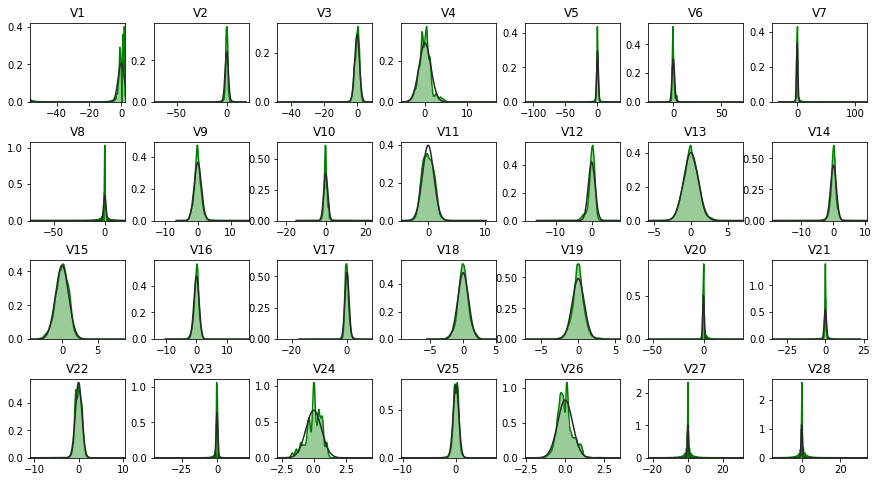

In [80]:
plot_hists( df, selection='regul' )

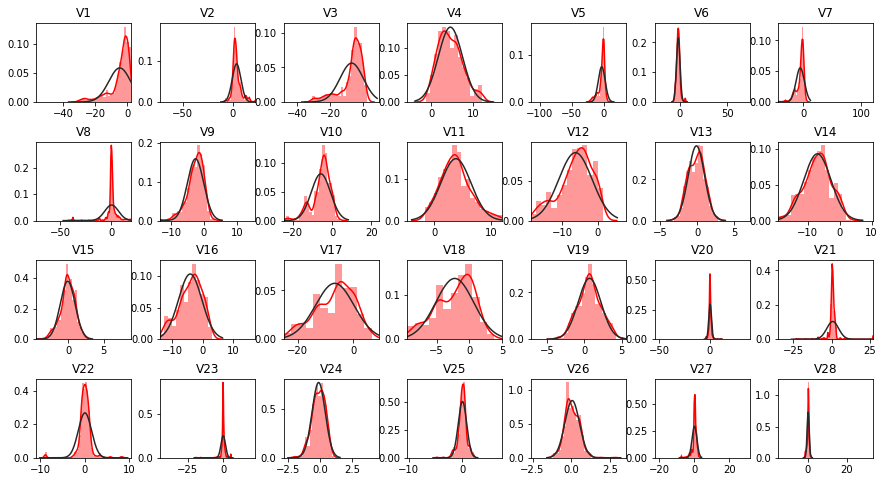

In [81]:
plot_hists( df, selection='fraud' )

In [15]:
def compare_hists( df ):
    ''' compare the fit curves between fraud and not fraud '''
    # ...
    # preparation of selection
    fraud = df['Class'] == 1
    regul = df['Class'] == 0
    # reate graphic
    f, axs = plt.subplots(4,7, figsize=(15, 8))
    plt.subplots_adjust( wspace=0.3, hspace=0.5 )
    # ...
    irow = 0
    icol = -1
    for ivar in range(1,29):
        # variable and row / column selection
        var_name = 'V'+str(ivar)
        icol += 1
        if icol == 7:
            irow += 1
            icol = 0
        axe = axs[irow,icol]
        if ivar == 1:
            label1 = 'regular'
            label2 = 'fraud'
        else:
            label1 = None
            label2 = None
        # plots
        sns.distplot( df[var_name][regul],ax=axe, color='green', hist=False, label=label1)
        sns.distplot( df[var_name][fraud],ax=axe, color='red', hist=False, label=label2)
        # graphic properties
        axe.set_xlabel(None)
        axe.set_title(var_name)
        axe.set_xlim([df[var_name].min(),df[var_name].max()])
    # ...
    return None

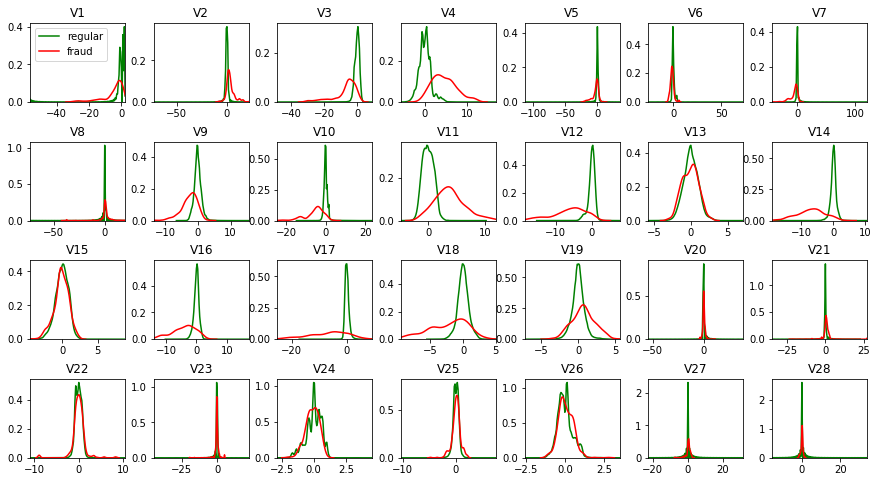

In [16]:
compare_hists( df )

### Analyse croisée des variables 2 à 2

Création d'un sous-dataframe avec toutes les transactions frauduleuses, et seulement un sample de transaction régulières

In [57]:
# exemple 1 : uniquement les N premières lignes
# sub_df = df[1:5000]
# exemple 2 : un sample
sub_df = df.sample(5000)
# exemple 3 :
fraud = df['Class'] == 1
regul = df['Class'] == 0
sub_df = pd.concat(( df[fraud], df[regul].sample(5000) )).sample(frac=1)
# ...
sub_df #.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
185139,126534.0,0.317583,-0.039890,-2.090199,-2.423180,1.462509,-1.213646,1.100029,-0.307431,-1.397713,...,0.701589,1.991320,-0.064331,0.248648,-0.957540,-0.148727,0.482412,0.370136,30.00,0
191157,129140.0,-2.200549,0.083068,1.549742,-0.878404,-0.190315,-0.521952,0.937090,-0.285306,0.638434,...,0.088087,0.643914,-0.604822,0.094212,0.669722,-0.306023,-0.848240,-0.340852,125.99,0
266809,162490.0,-1.611653,0.596050,-2.157620,1.040157,1.114430,-1.092390,2.431397,-1.214065,0.002708,...,0.297915,2.145749,0.365866,0.151219,-1.102296,-0.551228,-1.307556,0.397290,109.00,0
108691,71025.0,1.191529,0.191249,0.142706,0.456870,-0.029425,-0.103764,-0.149014,0.144133,-0.098671,...,-0.238026,-0.724261,0.113016,-0.373679,0.132975,0.129701,-0.015738,0.012446,2.67,0
209702,137668.0,2.112222,0.692068,-3.214782,0.709747,1.255172,-1.632278,0.817446,-0.477581,0.044369,...,-0.073951,-0.011127,-0.046308,0.560306,0.403330,0.681835,-0.082395,-0.013492,0.76,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125306,77611.0,1.173774,0.052096,-0.053815,0.263674,-0.499403,-1.696624,0.530984,-0.452357,-0.208018,...,0.023080,-0.036983,-0.071663,1.019028,0.462442,1.030564,-0.123112,0.006712,64.95,0
228902,145712.0,2.130842,-1.014479,-0.871865,-0.756575,-0.575068,0.327086,-1.002640,0.137047,-0.093623,...,-0.658889,-1.429916,0.333962,-1.458530,-0.635388,0.299667,-0.026979,-0.060804,27.98,0
20189,30843.0,1.235030,0.146778,0.144448,0.519011,-0.332872,-0.605650,-0.161160,0.080237,0.103840,...,-0.281140,-0.945725,0.099896,-0.098200,0.161607,0.104457,-0.040670,0.012922,1.98,0
69498,53451.0,0.385108,1.217620,-1.953872,2.087076,-1.144225,-0.576888,-2.582865,0.643230,-1.191233,...,0.594623,0.372144,-0.310456,-0.624065,0.840216,-0.159452,0.599482,0.288916,8.00,1


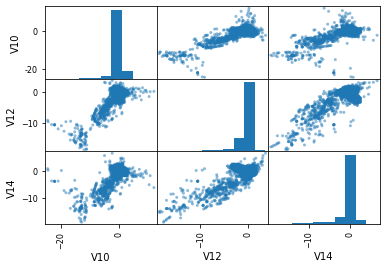

In [55]:
# uniquement 3 variables sur le sub dataframe
axs = scatter_matrix(sub_df[sub_df.columns[[10,12,14]]])

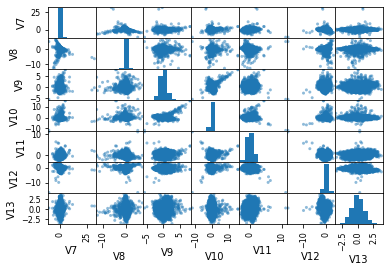

In [48]:
# uniquement V7 à V13
axs = scatter_matrix(sub_df[sub_df.columns[7:14]])

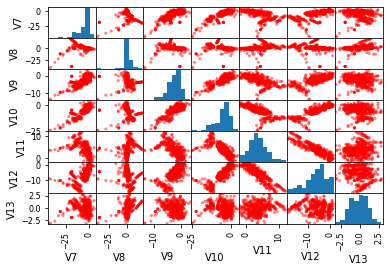

In [50]:
#Uniquement les transactions bancaires frauduleuses
axs = scatter_matrix(df[df.columns[7:14]].loc[df["Class"]==1], color='red')

C:\Users\etien\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


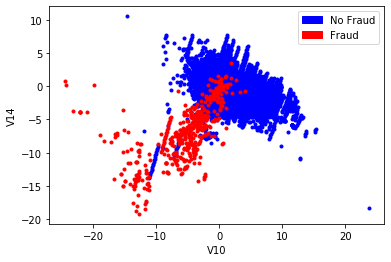

In [78]:
plt.plot(df[df.columns[10]].loc[df['Class'] == 0], df[df.columns[14]].loc[df['Class'] == 0], '.', color="blue")
plt.plot(df[df.columns[10]].loc[df['Class'] == 1], df[df.columns[14]].loc[df['Class'] == 1], '.', color="red")
plt.xlabel("V10")
plt.ylabel("V14")
blue_patch = mpatches.Patch(color='blue', label='No Fraud')
red_patch = mpatches.Patch(color='red', label='Fraud')
plt.legend(handles=[blue_patch, red_patch])

d:\python\envs\myenvcnn\lib\site-packages\IPython\core\events.py:74: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
d:\python\envs\myenvcnn\lib\site-packages\IPython\core\pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


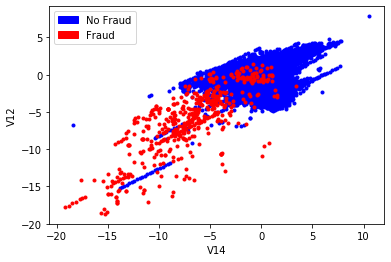

In [22]:
plt.plot(df[df.columns[14]].loc[df['Class'] == 0], df[df.columns[12]].loc[df['Class'] == 0], '.', color="blue")
plt.plot(df[df.columns[14]].loc[df['Class'] == 1], df[df.columns[12]].loc[df['Class'] == 1], '.', color="red")
plt.xlabel("V14")
plt.ylabel("V12")
blue_patch = mpatches.Patch(color='blue', label='No Fraud')
red_patch = mpatches.Patch(color='red', label='Fraud')
plt.legend(handles=[blue_patch, red_patch])

C:\Users\etien\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


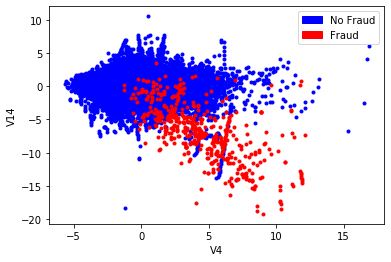

In [79]:
plt.plot(df[df.columns[4]].loc[df['Class'] == 0], df[df.columns[14]].loc[df['Class'] == 0], '.', color="blue")
plt.plot(df[df.columns[4]].loc[df['Class'] == 1], df[df.columns[14]].loc[df['Class'] == 1], '.', color="red")
plt.xlabel("V4")
plt.ylabel("V14")
blue_patch = mpatches.Patch(color='blue', label='No Fraud')
red_patch = mpatches.Patch(color='red', label='Fraud')
plt.legend(handles=[blue_patch, red_patch])

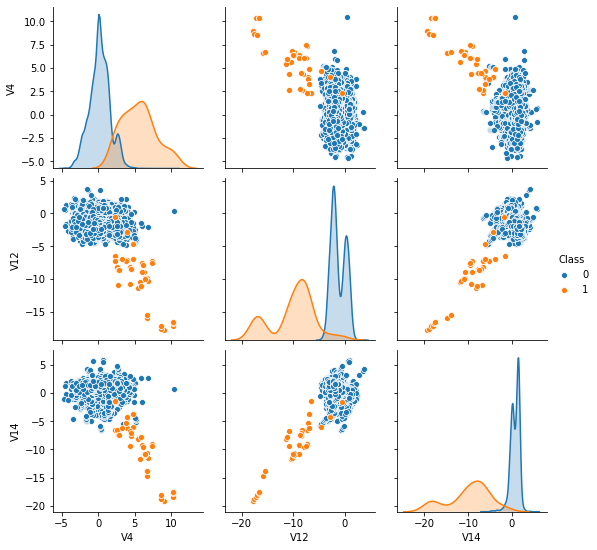

In [58]:
sns.pairplot(df.loc[0:10000,['V4', 'V12','V14','Class']], hue="Class")

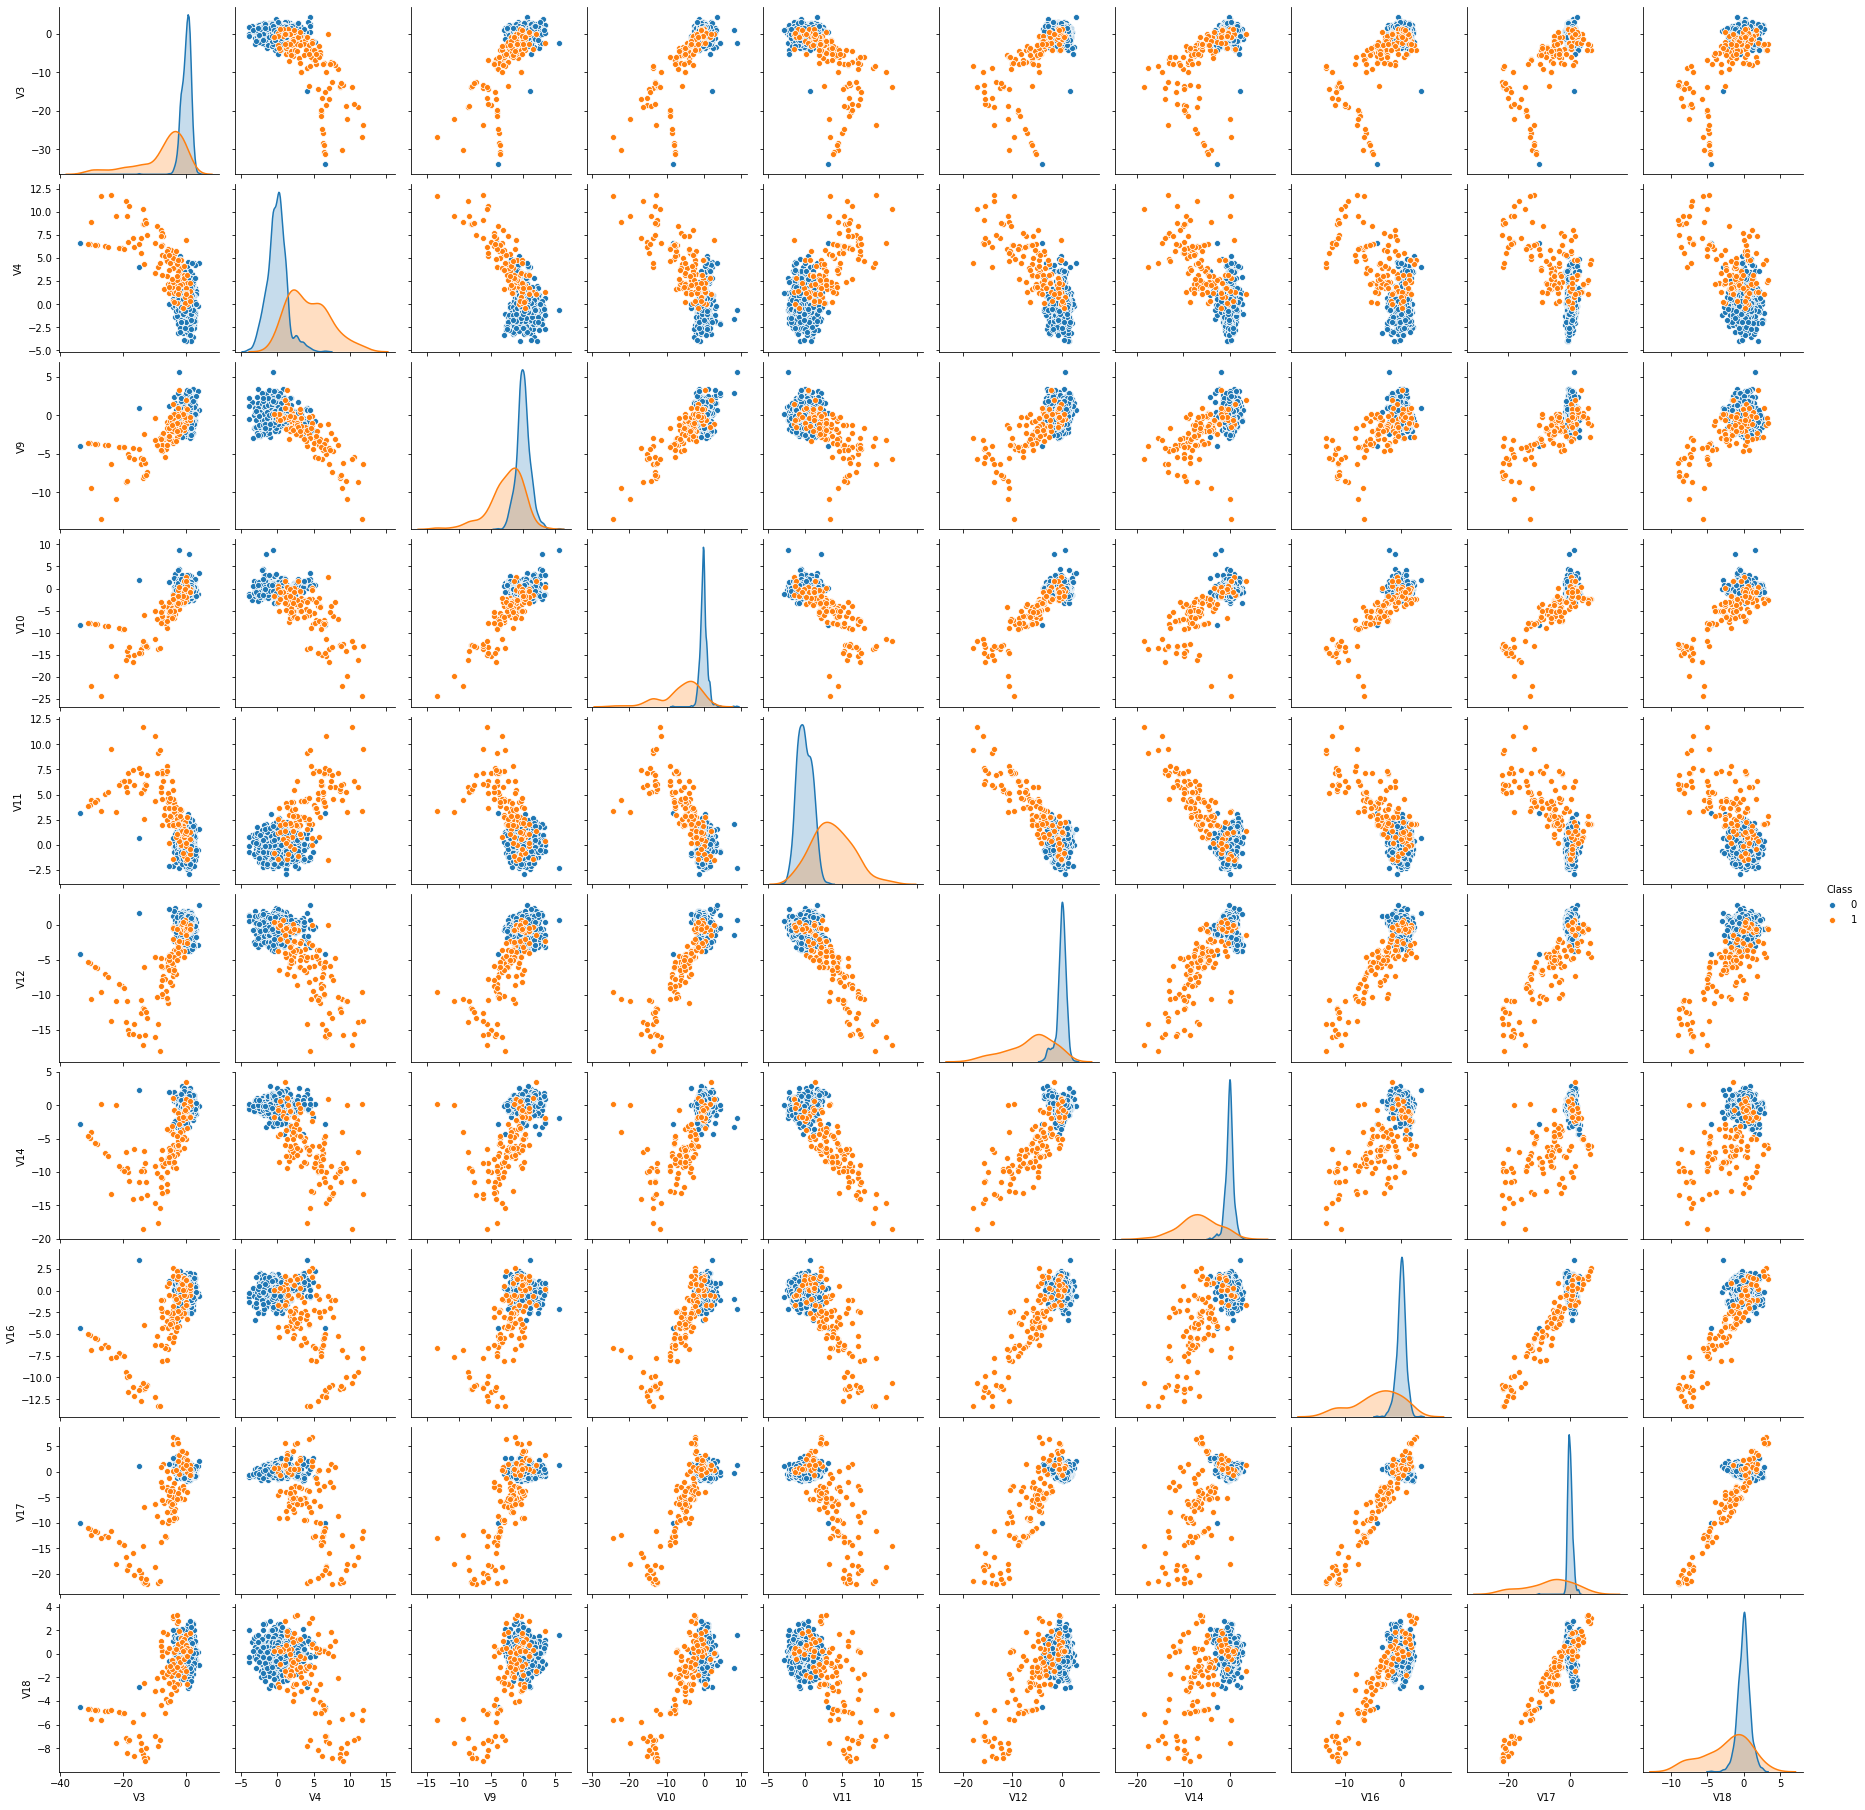

In [84]:
sns.pairplot(sub_df[['V3','V4','V9','V10','V11','V12','V14','V16','V17','V18','Class']].sample(frac=0.2), hue="Class")

In [83]:
sub_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
185139,126534.0,0.317583,-0.039890,-2.090199,-2.423180,1.462509,-1.213646,1.100029,-0.307431,-1.397713,...,0.701589,1.991320,-0.064331,0.248648,-0.957540,-0.148727,0.482412,0.370136,30.00,0
191157,129140.0,-2.200549,0.083068,1.549742,-0.878404,-0.190315,-0.521952,0.937090,-0.285306,0.638434,...,0.088087,0.643914,-0.604822,0.094212,0.669722,-0.306023,-0.848240,-0.340852,125.99,0
266809,162490.0,-1.611653,0.596050,-2.157620,1.040157,1.114430,-1.092390,2.431397,-1.214065,0.002708,...,0.297915,2.145749,0.365866,0.151219,-1.102296,-0.551228,-1.307556,0.397290,109.00,0
108691,71025.0,1.191529,0.191249,0.142706,0.456870,-0.029425,-0.103764,-0.149014,0.144133,-0.098671,...,-0.238026,-0.724261,0.113016,-0.373679,0.132975,0.129701,-0.015738,0.012446,2.67,0
209702,137668.0,2.112222,0.692068,-3.214782,0.709747,1.255172,-1.632278,0.817446,-0.477581,0.044369,...,-0.073951,-0.011127,-0.046308,0.560306,0.403330,0.681835,-0.082395,-0.013492,0.76,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125306,77611.0,1.173774,0.052096,-0.053815,0.263674,-0.499403,-1.696624,0.530984,-0.452357,-0.208018,...,0.023080,-0.036983,-0.071663,1.019028,0.462442,1.030564,-0.123112,0.006712,64.95,0
228902,145712.0,2.130842,-1.014479,-0.871865,-0.756575,-0.575068,0.327086,-1.002640,0.137047,-0.093623,...,-0.658889,-1.429916,0.333962,-1.458530,-0.635388,0.299667,-0.026979,-0.060804,27.98,0
20189,30843.0,1.235030,0.146778,0.144448,0.519011,-0.332872,-0.605650,-0.161160,0.080237,0.103840,...,-0.281140,-0.945725,0.099896,-0.098200,0.161607,0.104457,-0.040670,0.012922,1.98,0
69498,53451.0,0.385108,1.217620,-1.953872,2.087076,-1.144225,-0.576888,-2.582865,0.643230,-1.191233,...,0.594623,0.372144,-0.310456,-0.624065,0.840216,-0.159452,0.599482,0.288916,8.00,1
